# Bank Personal Loan Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

### 1. Reading the data file

In [2]:
df_bank=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df_bank.shape

(5000, 14)

Observation : We have total of 14 columns - 13 independent variables and 1 dependent variable("Personal Loan"). Also we have 5000 rows in data

### 2. Studying the data distribution

In [4]:
df_bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
df_bank.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df_bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

###### Observations:<br>
<p>Out of 14 variable columns, we have:<br>
1) 7 numerical variables- ID, Age, Experience, Income, Zipcode, CCAvg, Mortgage<br>
2) 5 boolean variables- Personal Loan, Securities Account, CD Account, Online, CreditCard<br>
3) 2 categorical variables- Family, Education<br></p>

All the variables are of Numeric datatype. No variable column has null value entry.


In [7]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
#Dropping Categorical columns and ID,ZIP code (as it is just a series of numbers)
df2_bank=df_bank.drop(['ID','ZIP Code','Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],axis=1)

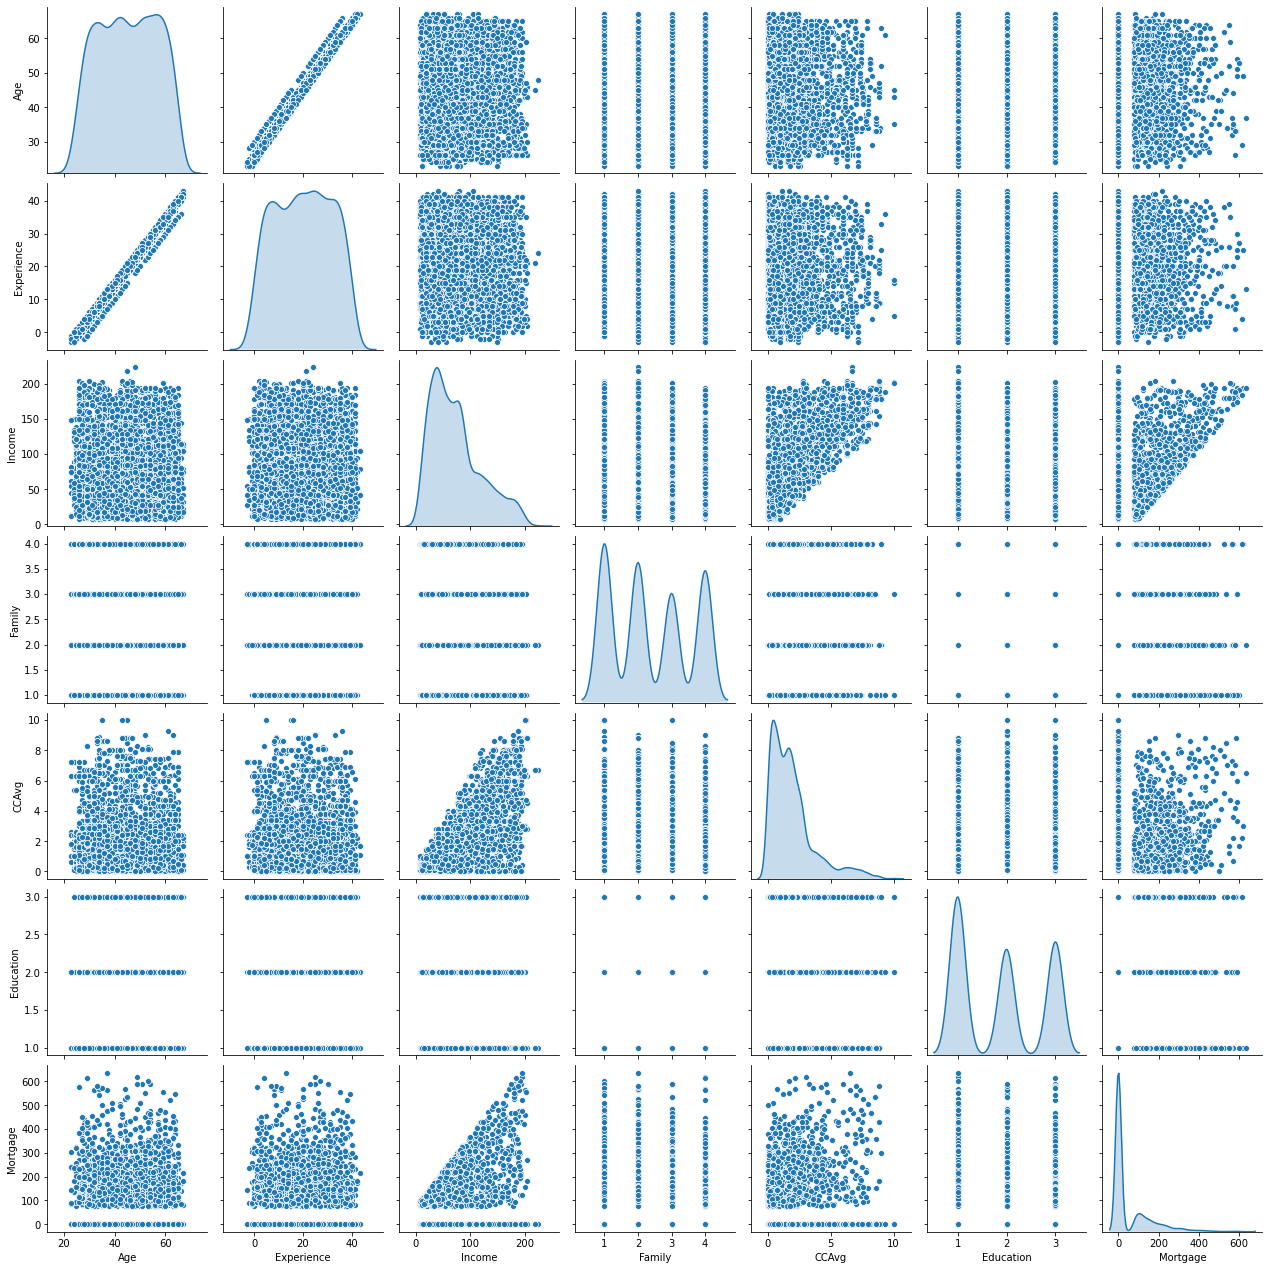

In [9]:
sns.pairplot(df2_bank,diag_kind='kde');

In [10]:
df2_bank.skew()

Age          -0.029341
Experience   -0.026325
Income        0.841339
Family        0.155221
CCAvg         1.598443
Education     0.227093
Mortgage      2.104002
dtype: float64

In [11]:
df_bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


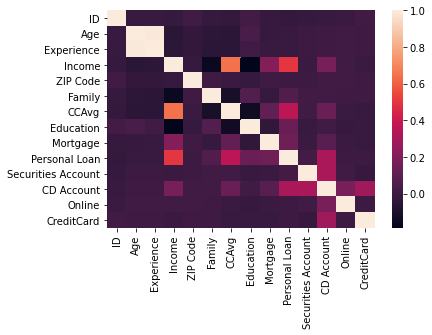

In [12]:
sns.heatmap(df_bank.corr())

###### Observation:<br>
<p>'Income' column is moderate positive skewed with mean value of 74, standard deviation of 46 and Skeweness of 0.84<br>
   'CCAvg' column is highly positive skewed with mean value of 1.93, standard deviation of 1.74 and Skeweness of 1.5<br>
   'Mortgage' column as well is highlt positive skewed with mean value of 56, standard deviation of 101 and Skeweness of 2.1<br></p>

<p>Age and Experience are negative skewed. Also both are highly correlated to each other with a corr. value of 0.99.</p>

<p>The target variable "Personal Loan" is positively correlated to "Income", "CCAvg", "CD Account".
    


### 3. Get the target column distribution.

In [13]:
df_bank.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [14]:
df3_bank=df_bank.copy()

df3_bank=df3_bank.drop(['ID','ZIP Code','Family','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],axis=1)

In [15]:
df3_bank.groupby(df3_bank['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


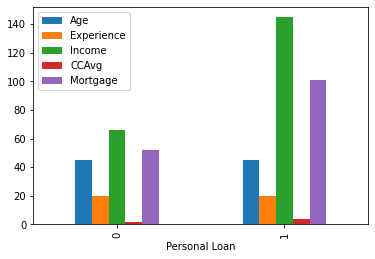

In [16]:
df3_bank.groupby(df3_bank['Personal Loan']).mean().plot(kind='bar');

###### Observations:<br>
<p>'Age' and 'Experience' variable doesn't indicate much difference between people who took and who didn't take loan last year.
    <br>Average Income of people who took loan last year is more than double the Average income of people who didn't tale loan.
    <br>Average Credit card expense of people who took loan is also more than double the average Credit card expense of people who didn't tale loan.<br>
    Average Mortgage of people who took loan is almost double the average Mortgage of people who didn't take loan.<br>

In [17]:
df_family=pd.crosstab(df_bank['Family'],df_bank['Personal Loan'])
df_family

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


In [18]:
df_family.div(df_family.sum(1),axis=0) #finding probability of each row

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


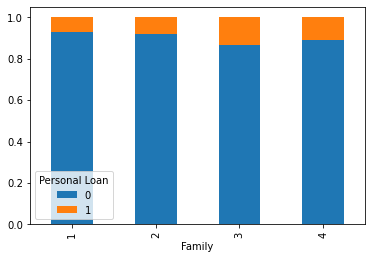

In [19]:
df_family.div(df_family.sum(1),axis=0).plot(kind='bar',stacked=True);

No clear observation can be made as number of family member doesn't significantly effect the chance of person opting for loan or not

In [20]:
df_edu=pd.crosstab(df_bank['Education'],df_bank['Personal Loan'])

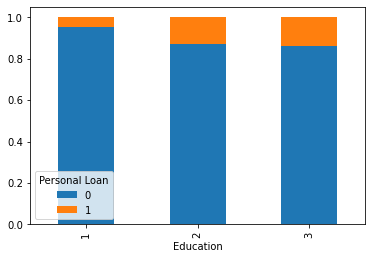

In [21]:
df_edu.div(df_edu.sum(1),axis=0).plot(kind='bar',stacked=True);

From above data we can infer that highly educated personal have higher probability of buying personal loan.

### 4. Split the data into training and test set in the ratio of 70:30 respectively

In [22]:
# We will drop ID, ZIP code as these are just a series of number
# We will also drop either Age or Experience column as they are highlt correlated with 0.99 corr. value(Stated above)

df_bank.drop(['ID','Experience','ZIP Code'],axis=1,inplace=True)

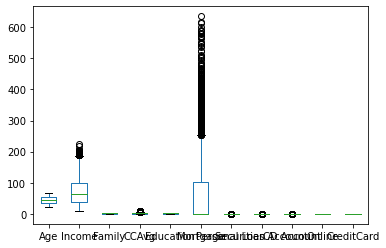

In [23]:
df_bank.plot(kind='box');

In [24]:
df_bank['mortgage_zscore']=np.abs(stats.zscore(df_bank['Mortgage']))
df_bank=df_bank[df_bank['mortgage_zscore']<3]
df_bank.drop('mortgage_zscore',axis=1,inplace=True)

df_bank.shape

C:\Users\ashut\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4895, 11)

In [25]:
X=df_bank.drop('Personal Loan',axis=1)
y=df_bank['Personal Loan']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

Checking the split of data

In [26]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_bank.index)) * 100))

69.99% data is in training set
30.01% data is in test set


### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans 

###### Logistic Regression Model

Mortgage is higly righ skewed because of these outliers, we need to remove the skeweness for better accuracy 

In [27]:
logistic_model= LogisticRegression(solver="liblinear")

logistic_model.fit(X_train,y_train)

#predicting on test
y_predict = logistic_model.predict(X_test)

In [28]:
logistic_score = logistic_model.score(X_test, y_test)
print(logistic_score)

0.9475833900612661


In [29]:
print(accuracy_score(y_test,y_predict))

0.9475833900612661


In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.81      0.52      0.63       128

    accuracy                           0.95      1469
   macro avg       0.89      0.75      0.80      1469
weighted avg       0.94      0.95      0.94      1469



In [31]:
print(confusion_matrix(y_test,y_predict))

[[1326   15]
 [  62   66]]


In [32]:
cm_logistic=confusion_matrix(y_test,y_predict)

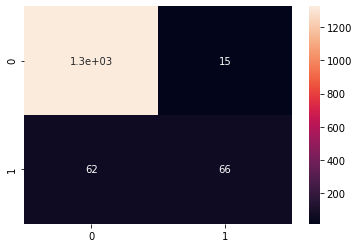

In [33]:
sns.heatmap(cm_logistic,annot=True)

Observation:<br>
<p> We have an accuracy of 95%(round figure) in our Logistic Regression model.<br></p>
<p> Looking at recall score we can interpret that 99% of the time our model correctly predicted the False values and 52% of the time it correctly predicted the True Positive Values<br></p>

###### KNN Model

In [34]:
knn_class = KNeighborsClassifier(n_neighbors=3)
#Train the model using the training sets
knn_class.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
#Predict the response for test dataset
y_predict1 = knn_class.predict(X_test)

In [36]:
knn_class.score(X_train,y_train)

0.9611792177466433

In [37]:
knn_class.score(X_test,y_test)

0.9149081007488087

In [38]:
print(accuracy_score(y_test,y_predict1))

0.9149081007488087


In [39]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1341
           1       0.51      0.44      0.47       128

    accuracy                           0.91      1469
   macro avg       0.73      0.70      0.71      1469
weighted avg       0.91      0.91      0.91      1469



In [40]:
print(confusion_matrix(y_test,y_predict1))

[[1288   53]
 [  72   56]]


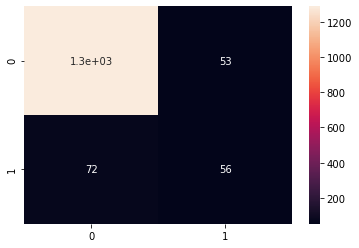

In [41]:
cm_knn=confusion_matrix(y_test,y_predict1)
sns.heatmap(cm_knn,annot=True)

Observation:<br>
<p> We have an accuracy of 91.5% in our KNN model.<br></p>
<p> Looking at recall score we can interpret that 96% of the time our model correctly predicted the False values and 44% of the time it correctly predicted the True Positive Values<br></p>

<p> I received better results in recall value, train and test score while taking n_neighbors=3. Below is the finding when n_neighbors was set to 5:<br>
    1) Recall value for True positive 39%<br>
    2) Train data score = 94%
    3) Test data score = 91.2%

###### Naive Bayes Model

In [42]:
NB_model = GaussianNB()

#Train the model using the training sets
NB_model.fit(X_train, y_train)

#Predict the response for test dataset
y_predict2 = NB_model.predict(X_test)

In [43]:
NB_model.score(X_train,y_train)

0.8940455341506129

In [44]:
NB_model.score(X_test,y_test)

0.8944860449285228

In [45]:
print(accuracy_score(y_test,y_predict2))

0.8944860449285228


In [46]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.49       128

    accuracy                           0.89      1469
   macro avg       0.69      0.75      0.72      1469
weighted avg       0.91      0.89      0.90      1469



In [47]:
print(confusion_matrix(y_test,y_predict2))

[[1239  102]
 [  53   75]]


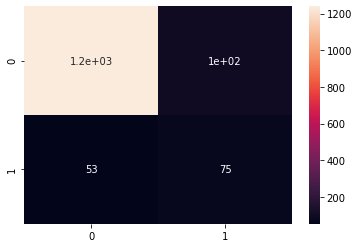

In [48]:
cm_NB=confusion_matrix(y_test,y_predict2)
sns.heatmap(cm_NB,annot=True)

Observation:<br>
<p> We have an accuracy of 89.4% in our Naive Bayes model.<br></p>
<p> Looking at recall score we can interpret that 92% of the time our model correctly predicted the False values and 59% of the time it correctly predicted the True Positive Values<br></p>

###### Scaled KNN Model

In [51]:
### let us check the effect of scaling (convert all dimensions to z scores)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
knn_class.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
predicted_labels = knn_class.predict(X_test_scaled)

In [54]:
print(confusion_matrix(y_test, predicted_labels))

[[1333    8]
 [  44   84]]


In [55]:
# summarize the fit of the model
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.91      0.66      0.76       128

    accuracy                           0.96      1469
   macro avg       0.94      0.83      0.87      1469
weighted avg       0.96      0.96      0.96      1469



In [56]:
print(accuracy_score(y_test,predicted_labels))

0.9646017699115044


### 7. Give your reasoning on which is the best model in this case and why it performs better?

The Scaled KNN model is the best model in this case. We have an accuracy of 96.4% along with good precision and recall accuracy value. The confusion matrix is also better in this model as the % of predicting False and True value is better.

The 2nd best model is Logistic Regression Model with accuracy of 94.7% along with good precision score of more than 80% and also good recall accuracy value.

Though the accuracy of normal KNN model is above 90% but confusion matrix tells that its % of correct predictions is not that much acceptable.

The Naive Bayes model has the least accuracy in comaprision to other models. So the Probabbility of determining the target correctly is also less in comparision.